In [22]:
## Phase de prétraitement :
## infos sur les données
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
df = pd.read_csv("titanic-passengers.csv")
df=pd.read_csv("titanic-passengers.csv",sep=";")
df
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [36]:
## les infos manquantes 
df=pd.read_csv("titanic-passengers.csv",sep=";")
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df=pd.read_csv("titanic-passengers.csv",sep=";")
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Cabin"].fillna('G6',inplace=True)
df.tail()
df["Embarked"].fillna('G6',inplace=True)
df.tail()  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,G6,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,G6,C
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,G6,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,G6,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.000000,0,0,250655,26.0000,G6,S


In [6]:
df.isnull().sum()   

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
dictSex = {'male': 1, 'female': 0}
df['Sex'].replace(dictSex, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [8]:
df["Age"].corr(df["Sex"])

0.08415343907994118

In [9]:
## 2. Phase de visualisation
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

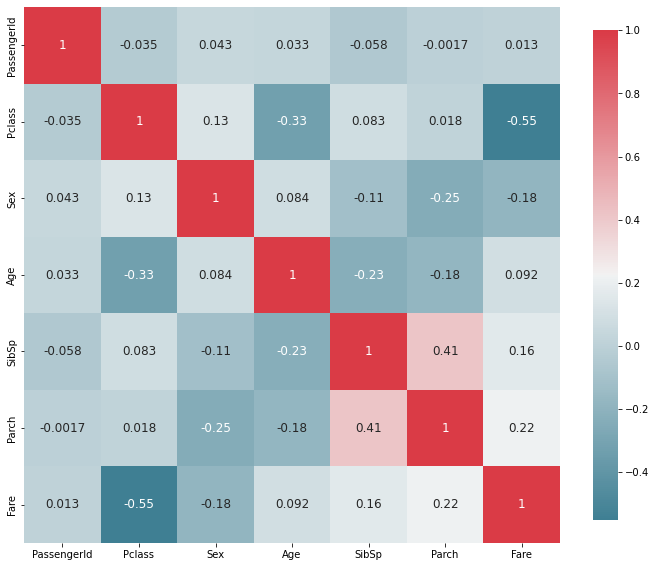

In [10]:
 plot_correlation_map( df )

In [23]:
# analyse
#la collération est faible entre les différents modalité.
#cela montre qu'il ya pas trop d'impacte sur la survie de la population 
#en question.

In [11]:
 #groupby combinée avec la moyenne pour visualiser la relation entre pclass 
#survivant 
df["Survived"]=Encoder.fit_transform(df["Survived"])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [12]:
#groupby combinée avec la moyenne pour visualiser la relation entre pclass 
#survivant 
df[["Survived","Pclass"]].groupby(["Survived"],as_index=True).mean()


,Pclass
Survived,
0,2.531876
1,1.950292


In [24]:
# Comme dernière étape, essayez de supprimer les colonnes inutiles "nom"
df.drop("Name", axis=1, inplace=True)


In [25]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [26]:

# Charger le fichier csv
df = pd.read_csv("titanic-passengers.csv", sep=";")

# Extraire le titre à partir de la colonne "Name"
df["Title"] = df["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

# Afficher les premières lignes du dataframe pour vérifier que la nouvelle colonne a bien été ajoutée
print(df.head())



   PassengerId Survived  Pclass                                         Name  \
0          343       No       2                   Collander, Mr. Erik Gustaf   
1           76       No       3                      Moen, Mr. Sigurd Hansen   
2          641       No       3                       Jensen, Mr. Hans Peder   
3          568       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)   
4          672       No       1                       Davidson, Mr. Thornton   

      Sex   Age  SibSp  Parch      Ticket     Fare  Cabin Embarked Title  
0    male  28.0      0      0      248740  13.0000    NaN        S    Mr  
1    male  25.0      0      0      348123   7.6500  F G73        S    Mr  
2    male  20.0      0      0      350050   7.8542    NaN        S    Mr  
3  female  29.0      0      4      349909  21.0750    NaN        S   Mrs  
4    male  31.0      1      0  F.C. 12750  52.0000    B71        S    Mr  


In [27]:
title_mapping = {"Collander, Mr. Erik Gustaf": 1, "Moen, Mr. Sigurd Hansen": 2, "Jensen, Mr. Hans Peder": 3, "Palsson, Mrs. Nils (Alma Cornelia Berglund)": 4, "Davidson, Mr. Thornton": 5}

df['Title'] = df['Title'].map(title_mapping)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,NaN
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,NaN
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,NaN
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,NaN
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,NaN


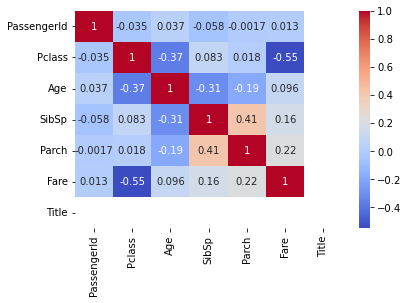

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer une matrice de corrélation
corr = df.corr()

# Afficher un heatmap de la matrice de corrélation
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [29]:
# Remplacer les titres similaires par un titre commun



In [30]:
Title_Dictionary = {
    "Capt": "Officier",
    "Col": "Officier",
    "Major": "Officier",
    "Dr": "Officier",
    "Rev": "Officier",
    "Jonkheer": "Royauté",
    "Don": "Royauté",
    "Monsieur": "Royauté",
    "Lady": "Royauté",
    "la Comtesse": "Royauté",
    "Dona": "Royauté",
    "Mme": "Madame",
    "Mlle": "Mademoiselle",
    "Ms": "Madame",
    "Mr": "Monsieur",
    "Mrs": "Madame",
    "Miss": "Mademoiselle",
    "Master": "Maître"
}

df["Titre"] = df["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())
df["Titre"] = df["Titre"].map(Title_Dictionary)



In [31]:

# Group the titles that are too similar
df["Titre"].replace({
    "Mlle": "Mademoiselle",
    "Mme": "Madame",
    "Monsieur": "Madame",
}, inplace=True)


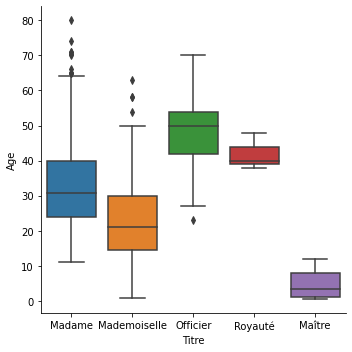

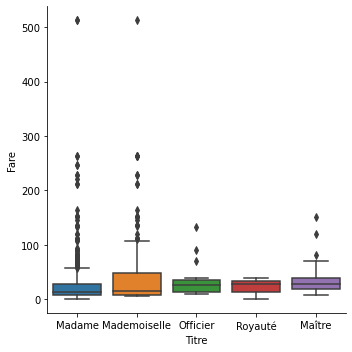

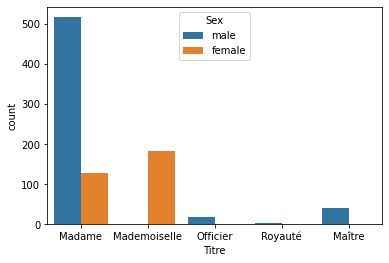

In [32]:

# Visualize the correlation between the title and other features
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x="Titre", y="Age", data=df, kind="box")
plt.show()

sns.catplot(x="Titre", y="Fare", data=df, kind="box")
plt.show()

sns.countplot(x="Titre", hue="Sex", data=df)
plt.show()


In [34]:
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Titre,FamilySize
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,NaN,Madame,1
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,NaN,Madame,1
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,NaN,Madame,1
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,NaN,Madame,5
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,NaN,Madame,2


In [43]:
# oui cette fonctionnalité est utile